# Assignment 4
## Description
In this assignment you must read in a file of metropolitan regions and associated sports teams from [assets/wikipedia_data.html](assets/wikipedia_data.html) and answer some questions about each metropolitan region. Each of these regions may have one or more teams from the "Big 4": NFL (football, in [assets/nfl.csv](assets/nfl.csv)), MLB (baseball, in [assets/mlb.csv](assets/mlb.csv)), NBA (basketball, in [assets/nba.csv](assets/nba.csv) or NHL (hockey, in [assets/nhl.csv](assets/nhl.csv)). Please keep in mind that all questions are from the perspective of the metropolitan region, and that this file is the "source of authority" for the location of a given sports team. Thus teams which are commonly known by a different area (e.g. "Oakland Raiders") need to be mapped into the metropolitan region given (e.g. San Francisco Bay Area). This will require some human data understanding outside of the data you've been given (e.g. you will have to hand-code some names, and might need to google to find out where teams are)!

For each sport I would like you to answer the question: **what is the win/loss ratio's correlation with the population of the city it is in?** Win/Loss ratio refers to the number of wins over the number of wins plus the number of losses. Remember that to calculate the correlation with [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html), so you are going to send in two ordered lists of values, the populations from the wikipedia_data.html file and the win/loss ratio for a given sport in the same order. Average the win/loss ratios for those cities which have multiple teams of a single sport. Each sport is worth an equal amount in this assignment (20%\*4=80%) of the grade for this assignment. You should only use data **from year 2018** for your analysis -- this is important!

## Notes

1. Do not include data about the MLS or CFL in any of the work you are doing, we're only interested in the Big 4 in this assignment.
2. I highly suggest that you first tackle the four correlation questions in order, as they are all similar and worth the majority of grades for this assignment. This is by design!
3. It's fair game to talk with peers about high level strategy as well as the relationship between metropolitan areas and sports teams. However, do not post code solving aspects of the assignment (including such as dictionaries mapping areas to teams, or regexes which will clean up names).
4. There may be more teams than the assert statements test, remember to collapse multiple teams in one city into a single value!

As this assignment utilizes global variables in the skeleton code, to avoid having errors in your code you can either:

1. You can place all of your code within the function definitions for all of the questions (other than import statements).
2. You can create copies of all the global variables with the copy() method and proceed as usual.

## Question 1
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **NHL** using **2018** data.

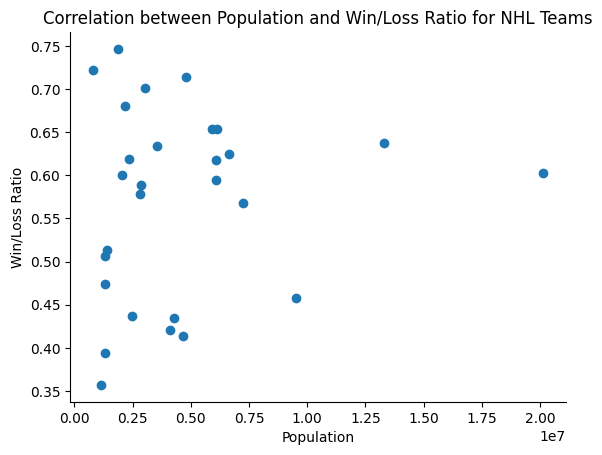

In [106]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

nhl_df = pd.read_csv("C:/Users/HP/Downloads/MIT-Python For Data Science/Course_1/assignments/course1_assignment4/assets/nhl.csv")
cities = pd.read_html("C:/Users/HP/Downloads/MIT-Python For Data Science/Course_1/assignments/course1_assignment4/assets/wikipedia_data.html")[1]
cities = cities.iloc[:-1,[0,3,5,6,7,8]]

def get_area(team):
    for each in list(cities.index.values):
        if team in cities.at[each, 'NHL']:
            return cities.at[each, 'Metropolitan area']
        
# Cleaning 
pattern = r"(\b[A-Za-z\s]+\b)"
cities['NHL'] = cities['NHL'].str.extract(pattern)

mask = cities['NHL'].str.contains('note', case=False, na=False)

# Set the corresponding rows to NaN
cities.loc[mask, 'NHL'] = np.NaN
# And then dropping the NaN
cities.dropna(subset = ['NHL'], inplace = True)
#cities.loc[cities['']]
# Stripping the metropolitan area
cities['Metropolitan area'] = cities['Metropolitan area'].str.strip()
cities['NHL'] = cities['NHL'].str.strip()
cities['NHL'] = cities['NHL'].str.split(" ").str[-1:]
cities['NHL'] = cities['NHL'].str[0]
# Separate out the columns we want to merge later on
columns = ['Metropolitan area','Population (2016 est.)[8]']
population = cities[columns]
# Lets rename the columns into somewhat easy syntax
population = population.rename(columns = {'Population (2016 est.)[8]' : 'Population'})
population

# Now lets clean the nhl_df
nhl_df = nhl_df[nhl_df['year'] == 2018]
# We selected the columns to keep
columns_to_keep = ['team', 'W', 'L']
nhl_df = nhl_df[columns_to_keep]
# We dropped the rows with unnecessary data 
nhl_df = nhl_df.drop([0, 9, 18, 26])
# Now to remove the * sign from the name of teams names and remove any white space 
nhl_df['team'] = nhl_df['team'].replace('\*','', regex = True).str.strip()
nhl_df['Area'] = nhl_df['team'].str.split(" ").str[-1:]
nhl_df['Area'] = nhl_df['Area'].str[0]
# To map the teams over the metropolitan areas 
columns_to_keep2 = ['Metropolitan area', 'NHL']
nhl_cities = cities[columns_to_keep2].set_index('NHL')

nhl_df['Area'] = nhl_df['Area'].apply(lambda x : get_area(x))
# one row per area that is skipping the rows with no area or None value 
nhl_df = nhl_df.groupby('Area').sum()
nhl_df[['W', 'L']] = nhl_df[['W', 'L']].astype(int)
nhl_df['Ratio'] = nhl_df['W'] /( nhl_df['W'] + nhl_df['L'])

# Now lets merge the two 
combined = pd.merge(nhl_df, population, left_on = 'Area', right_on = 'Metropolitan area')
combined['Population'] = combined['Population'].astype(int)

def nhl_correlation(): 
    
    population_by_region = combined['Population']#pass in metropolitan area population from cities
    win_loss_by_region = combined['Ratio'] #pass in win/loss ratio from nhl_df in the same order as cities["Metropolitan area"]

    assert len(population_by_region) == len(win_loss_by_region), "Q1: Your lists must be the same length"
    assert len(population_by_region) == 28, "Q1: There should be 28 teams being analysed for NHL"
    
    return stats.pearsonr(population_by_region, win_loss_by_region)[0]

nhl_correlation()
combined.drop( ['W', 'L', 'Metropolitan area'] , inplace = True, axis = 1)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(combined['Population'], combined['Ratio'])
plt.xlabel('Population')
plt.ylabel('Win/Loss Ratio')
plt.title('Correlation between Population and Win/Loss Ratio for NHL Teams')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# if you are interested in understanding how population size affects the win/loss ratio, you may put the
# win/loss ratio on the y-axis and the population on the x-axis.

## Question 2
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **NBA** using **2018** data.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

def gets_area(team):
    for each in list(nba_cities.index.values):
        if  team in each: return nba_cities.at[each, 'Metropolitan area']

    
nba_df=pd.read_csv("assets/nba.csv")
cities=pd.read_html("assets/wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

population =cities[['Metropolitan area', 'Population (2016 est.)[8]']]
population['Metropolitan area']=population['Metropolitan area'].str.strip()
population.rename(columns={'Population (2016 est.)[8]':'Population'},inplace=True)
population = population.set_index('Metropolitan area')

cities['NBA'].replace(r'(.*)\[.*\].*|[-—]',r'\1',regex=True, inplace=True)
cities['NBA'].replace('—', np.nan, inplace=True)
cities['NBA']=cities['NBA'].str.strip('—').str.strip(' ')
cities['NBA'].replace('', np.nan, inplace=True)
cities.dropna(inplace=True)


nba_cities = cities[['Metropolitan area', 'NBA']].set_index('NBA')

nba_df=nba_df[nba_df['year']==2018].drop(['W/L%','GB','PS/G','PA/G','SRS', 'League','year'],axis=1)
nba_df['team'].replace(r'(.*)[\*]|[\(].*',r"\1".strip(),regex=True, inplace=True)
nba_df[['team','W','L']]=nba_df[['team','W','L']].apply(lambda x: x.str.strip())

nba_df['Area']=nba_df['team'].str.split(" ").str[-1:]
nba_df["Area"]= nba_df["Area"].str[0]
nba_df['Area'] = nba_df['Area'].apply(lambda x: gets_area(x))
#print(nba_df)
nba_df[['W','L']] = nba_df[['W','L']].apply(pd.to_numeric, axis=1)
nba_df=nba_df.groupby('Area').sum()
nba_df.eval("Ratio =W / (W + L)", inplace=True)
nba_df.drop(['W','L'], axis=1,inplace=True)

out_df = pd.merge(nba_df, population, how="inner", left_index=True, right_index=True)
out_df['Population']=pd.to_numeric(out_df['Population'])
#print(out_df)

def nba_correlation():
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    population_by_region = out_df['Population'] # pass in metropolitan area population from cities
    win_loss_by_region = out_df['Ratio'] # pass in win/loss ratio from nba_df in the same order as cities["Metropolitan area"]

    
    assert len(population_by_region) == len(win_loss_by_region), "Q2: Your lists must be the same length"
    assert len(population_by_region) == 28, "Q2: There should be 28 teams being analysed for NBA"

    return stats.pearsonr(population_by_region, win_loss_by_region)[0]
nba_correlation()

def get_nba_data():
    return out_df

## Question 3
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **MLB** using **2018** data.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

def gets_area(team):
    for each in list(mlb_cities.index.values):
        if  team in each: return mlb_cities.at[each, 'Metropolitan area']
        
mlb_df=pd.read_csv("assets/mlb.csv")
cities=pd.read_html("assets/wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]
#cities.to_excel("cities_before.xlsx")
#print(cities)

population =cities[['Metropolitan area', 'Population (2016 est.)[8]']]
population['Metropolitan area']=population['Metropolitan area'].str.strip()
population.rename(columns={'Population (2016 est.)[8]':'Population'},inplace=True)
population = population.set_index('Metropolitan area')

cities['MLB'].replace(r'(.*)\[.*\].*|[-—]',r'\1',regex=True, inplace=True)
cities['MLB'].replace('—', np.nan, inplace=True)
cities['MLB']=cities['MLB'].str.strip('—').str.strip(' ')
cities['MLB'].replace('', np.nan, inplace=True)
#cities.to_excel('asdsad.xlsx')
cities.dropna(inplace=True)

mlb_cities = cities[['Metropolitan area', 'MLB']].set_index('MLB')
#print(mlb_cities)

mlb_df=mlb_df[mlb_df['year']==2018].drop(['GB','W-L%','League','year'],axis=1)
#mlb_df.to_excel("mlb_df.xlsx")

mlb_df['team'].replace(r'(.*)[\*]|[\(].*',r"\1".strip(),regex=True, inplace=True)
mlb_df[['team']]=mlb_df[['team']].apply(lambda x: x.str.strip())
mlb_df['Area']=mlb_df['team'].str.split(" ").str[-1:]
mlb_df["Area"]= mlb_df["Area"].str[0]
mlb_df['Area'] = mlb_df['Area'].apply(lambda x: gets_area(x))
#print(mlb_df)
mlb_df.loc[0,'Area']='Boston'
#if mlb_df['team']== 'Boston Red Sox': 
#    print(mlb_df)
#    mlb_df['Area']="Boston"
    
#mlb_df.to_excel("mlb_dfs.xlsx")
#print(mlb_df)
#mlb_df.rename(columns=lambda x: x.strip())
mlb_df[['W','L']] = mlb_df[['W','L']].apply(pd.to_numeric, axis=1)
mlb_df=mlb_df.groupby('Area').sum()
#print(len(mlb_df))
mlb_df.eval("Ratio =W / (W + L)", inplace=True)
mlb_df.drop(['W','L'], axis=1,inplace=True)


#mlb_df.to_excel("mlb-modified.xlsx")
#print(len(mlb_df))

#print(mlb_df)
out_df = pd.merge(mlb_df, population, how="inner", left_index=True, right_index=True)
out_df['Population']=pd.to_numeric(out_df['Population'])

#print(out_df)
def mlb_correlation(): 
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    population_by_region = out_df['Population'] # pass in metropolitan area population from cities
    win_loss_by_region =out_df['Ratio'] # pass in win/loss ratio from mlb_df in the same order as cities["Metropolitan area"]
    assert len(population_by_region) == len(win_loss_by_region), "Q3: Your lists must be the same length"
    assert len(population_by_region) == 26, "Q3: There should be 26 teams being analysed for MLB"
    return stats.pearsonr(population_by_region, win_loss_by_region)[0]
mlb_correlation()

def get_mlb_data():
    return out_df

## Question 4
For this question, calculate the win/loss ratio's correlation with the population of the city it is in for the **NFL** using **2018** data.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

def gets_area(team):
    for each in list(nfl_cities.index.values):
        if  team in each: return nfl_cities.at[each, 'Metropolitan area']
        
nfl_df=pd.read_csv("assets/nfl.csv")
cities=pd.read_html("assets/wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

population =cities[['Metropolitan area', 'Population (2016 est.)[8]']]
population['Metropolitan area']=population['Metropolitan area'].str.strip()
population.rename(columns={'Population (2016 est.)[8]':'Population'},inplace=True)
population = population.set_index('Metropolitan area')


cities['NFL'].replace(r'(.*)\[.*\].*|[-—]',r'\1',regex=True, inplace=True)
cities['NFL'].replace('—', np.nan, inplace=True)
cities['NFL']=cities['NFL'].str.strip('—').str.strip(' ')
cities['NFL'].replace('', np.nan, inplace=True)
#cities.to_excel('c1.xlsx')
cities.dropna(inplace=True)

nfl_cities = cities[['Metropolitan area', 'NFL']].set_index('NFL')
nfl_df=nfl_df[nfl_df['year']==2018].iloc[:,[1,11,13,14]]
nfl_df.drop([0, 5, 10,15,20, 25,30,35],axis=0,inplace=True)
nfl_df['team'].replace(r'(.*)[\*+]|[\(].*',r"\1".strip(),regex=True, inplace=True)
#nfl_df.to_excel("n1.xlsx")
nfl_df[['team']]=nfl_df[['team']].apply(lambda x: x.str.strip())
nfl_df['Area']=nfl_df['team'].str.split(" ").str[-1:]
nfl_df["Area"]= nfl_df["Area"].str[0]
nfl_df['Area'] = nfl_df['Area'].apply(lambda x: gets_area(x))
#nfl_df.to_excel("n2.xlsx")

nfl_df[['W','L']] = nfl_df[['W','L']].apply(pd.to_numeric, axis=1)
print(nfl_df)
nfl_df=nfl_df.groupby('Area').sum()
print(nfl_df)
nfl_df.eval("Ratio =W / (W + L)", inplace=True)
nfl_df.drop(['W','L','year'], axis=1,inplace=True)
#print(len(nfl_df))
out_df = pd.merge(nfl_df, population, how="inner", left_index=True, right_index=True)
out_df['Population']=pd.to_numeric(out_df['Population'])
#out_df.to_excel('Q4.xlsx')
print(out_df)
def nfl_correlation(): 
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    population_by_region =out_df['Population'] # pass in metropolitan area population from cities
    win_loss_by_region =out_df['Ratio'] # pass in win/loss ratio from nfl_df in the same order as cities["Metropolitan area"]

    assert len(population_by_region) == len(win_loss_by_region), "Q4: Your lists must be the same length"
    assert len(population_by_region) == 29, "Q4: There should be 29 teams being analysed for NFL"

    return stats.pearsonr(population_by_region, win_loss_by_region)[0]

#nfl_correlation()

#def get_nfl_data():
   # return out_df
sports = ['NFL', 'NBA', 'NHL', 'MLB']
p_values = pd.DataFrame({k: np.nan for k in sports}, index=sports)
p_values

## Question 5
In this question I would like you to explore the hypothesis that **given that an area has two sports teams in different sports, those teams will perform the same within their respective sports**. How I would like to see this explored is with a series of paired t-tests (so use [`ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)) between all pairs of sports. Are there any sports where we can reject the null hypothesis? Again, average values where a sport has multiple teams in one region. Remember, you will only be including, for each sport, cities which have teams engaged in that sport, drop others as appropriate. This question is worth 20% of the grade for this assignment.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

mlb_df=pd.read_csv("assets/mlb.csv"
nhl_df=pd.read_csv("assets/nhl.csv")
nba_df=pd.read_csv("assets/nba.csv")
nfl_df=pd.read_csv("assets/nfl.csv")
cities=pd.read_html("assets/wikipedia_data.html")[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

def sports_team_performance():
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Note: p_values is a full dataframe, so df.loc["NFL","NBA"] should be the same as df.loc["NBA","NFL"] and
    # df.loc["NFL","NFL"] should return np.nan
    sports = ['NFL', 'NBA', 'NHL', 'MLB']
    p_values = pd.DataFrame({k:np.nan for k in sports}, index=sports)
    
    assert abs(p_values.loc["NBA", "NHL"] - 0.02) <= 1e-2, "The NBA-NHL p-value should be around 0.02"
    assert abs(p_values.loc["MLB", "NFL"] - 0.80) <= 1e-2, "The MLB-NFL p-value should be around 0.80"
    return p_values
sports_team_performance()